# Overview of python GIS related libraries
- [source blog](https://medium.com/@chrieke/essential-geospatial-python-libraries-5d82fcc38731)  
- great workflow: [link](https://github.com/loicdtx/python-geospatial-ecosystem),[img](https://raw.githubusercontent.com/loicdtx/python-geospatial-ecosystem/master/overview.png)
- awesome list [repo](https://github.com/sacridini/Awesome-Geospatial)


Outline
1. Shapely: (Vector files) 2D geometry objects and operations
2. GeoPandas: pandas df + geom; crs conversion
3. RasterIO: raster data IO, operations
3. Visualization
    - mapboxgl extension

In [1]:
import numpy as np
import geopandas as gpd

---
## [Shapely](https://shapely.readthedocs.io/en/stable/manual.html)
**2D-Planar** geometry library that follows OpenGIS conventions 

- Creates geometry objects (eg. Point, LineString, Polygon) and manipulates  them (eg. intersects, union)
- Caveats
    1. Does *NOT* support coordinate system transformation and assumes the features exist in the same Cartesian (2D) plane 
    2. It's a planar geometry library: any z-coordinate will be ignored (though can be specified), and all operations will be performed on the x-y plane.
    3. In all constructors, any numeric values are converted to type `float`


In [2]:
from IPython.display import display
from shapely.geometry import Point, MultiPoint, LineString,LinearRing, MultiLineString
from shapely.geometry import Polygon

1. Geometric Objects

In [3]:
# Point
p1 = Point(0, 10) # x,y
print(p1.area, p1.length)
print(f'p1 bounds: {p1.bounds}')

p2 = Point(p1) # makes a new object using another Point instance
print(f'p2 bounds: {p2.bounds}')

print(f'p1 == p2: {id(p1)==id(p2)}')

0.0 0.0
p1 bounds: (0.0, 10.0, 0.0, 10.0)
p2 bounds: (0.0, 10.0, 0.0, 10.0)
p1 == p2: False


In [4]:
# MultiPoint
points = np.zeros((10,2))
for i in range(len(points)):
    points[i] = (i,i)
print(f'points: \n{points}')

points: 
[[0. 0.]
 [1. 1.]
 [2. 2.]
 [3. 3.]
 [4. 4.]
 [5. 5.]
 [6. 6.]
 [7. 7.]
 [8. 8.]
 [9. 9.]]


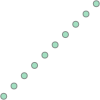

In [5]:
points = MultiPoint(points)
display(points)

In [6]:
# LineString
# In shapely, `LineString` represents a line, ie. a curve

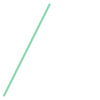

In [7]:
# Create a line with start and end points
start = (0,0)
end = (10,20)
line = LineString([start, end])
display(line)

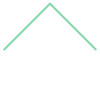

In [8]:
# Create a line (ie.curve) with two line segments
line2 = LineString([(0,0), (1,1), (2,0)])
display(line2)
                    

In [9]:
# Draw a curve

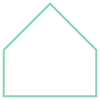

In [10]:
points = [(0,0), (1,1), (2,0), (2,-1), (0,-1), (0,0)]
line3 = LineString(points)
display(line3)

In [11]:
# Geometric operations/queries
print(f'line is closed?: {line3.is_closed}')
print(f'Centroid: {line3.centroid}')
print(f'area: {line3.area}, boundary: {line3.boundary}') # any line has area of zero
print(f'length:  {line3.length}')
print(f'bounds (xmin, ymin, xmax, ymax): {line3.bounds}')

line is closed?: True
Centroid: POINT (1 -0.2322330470336312)
area: 0.0, boundary: MULTIPOINT EMPTY
length:  6.82842712474619
bounds (xmin, ymin, xmax, ymax): (0.0, -1.0, 2.0, 1.0)


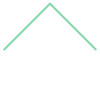

In [12]:
# Another way to construct a LineString object is to use 
# a mixture of float tuples (for x,y coordinates) and Point objects
line4 = LineString([(0,0), (2.5,2.5), Point(5,0)])
display(line4)

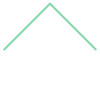

In [13]:
# Copy constructor
line5 = LineString(line4)
display(line5)

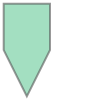

area: 1.5
perimeter: 5.236


In [14]:
# Polygons
# Use order sequence (tuple) of point cooridinates
coords = ((0,0), (0,1), (1,1), (1,0), (0.5,-1) )
poly = Polygon(coords)
display(poly)
print(f'area: {poly.area}')
print(f'perimeter: {poly.length:.3f}')

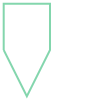

outline perimeter: 5.236
outline bound points: (0.0, -1.0, 1.0, 1.0), which corresponds to (xmin, ymin, xmax, ymax)


In [15]:
outline = poly.boundary
display(outline) # one-dimension lower geometry object. If Polygon, then its boundary is a line
print(f'outline perimeter: {outline.length:.3f}')
print(f'outline bound points: {outline.bounds}, which corresponds to (xmin, ymin, xmax, ymax)')

A polygon can be more complex, and can have some interiors (holes).


In [16]:
# Polygon with interiors

Use the (optional) second argument to the constructor to specify the interior (hole) geometry.

The constructor format is: 
```python
Polygon (boundary_coords, [hole_geom1, hole_geom2, ...])
```
     
Note that the first argument defines a (single) boundary of the polygon,
while the second argument (which is a list of geometry instances) defines any
number of holes of the polygon.
So, if you want to get the coordinates of the boundary for this polygon, use `exterior` property
And, to access the list of interior geometries, use `interiors` property -- notice this is a plural.

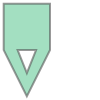

In [17]:
coords_out = ( (0,0), (0,1), (1,1), (1,0), (0.5,-1) )
coords_in = ( (0.3,0), (0.7,0), (0.5,-0.5) )
hole = LinearRing(coords_in)

poly2 = Polygon(coords_out, [hole])
display(poly2)

In [18]:
## Component rings can be accessed via `exterior` and `interior` properties
print("Type of Polygon instance's exterior properties: ", type(poly2.exterior))
print("\t interior property's type: ", type(poly2.interiors))

Type of Polygon instance's exterior properties:  <class 'shapely.geometry.polygon.LinearRing'>
	 interior property's type:  <class 'shapely.geometry.polygon.InteriorRingSequence'>


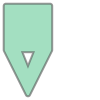

type of buffered polygon:  <class 'shapely.geometry.polygon.Polygon'>


In [19]:
## Another example of a polygon with holes
poly3 = poly2.buffer(0.05)
display(poly3)
print('type of buffered polygon: ', type(poly3))

In [20]:
poly3.exterior??

Type:        property
String form: <property object at 0x11676d3b8>
Source:     
# poly3.exterior.fget
@property
def exterior(self):
    if self.is_empty:
        return None
    elif self._exterior is None or self._exterior() is None:
        g = lgeos.GEOSGetExteriorRing(self._geom)
        ring = LinearRing()
        ring._geom = g
        ring.__p__ = self
        ring._other_owned = True
        ring._ndim = self._ndim
        self._exterior = weakref.ref(ring)
    return self._exterior()


In [21]:
print(poly3.exterior)

LINEARRING (-0.04472135954999579 -0.0223606797749979, -0.04659974791155542 -0.01812356186237922, -0.04807772307338321 -0.01373071535205198, -0.04914258537957569 -0.009219886236343402, -0.04978518488957726 -0.004629834285436988, -0.05 0, -0.05 1, -0.04975923633360985 1.004900857016478, -0.04903926402016152 1.009754516100806, -0.04784701678661044 1.014514233862723, -0.04619397662556434 1.019134171618254, -0.04409606321741775 1.0235698368413, -0.04157348061512727 1.02777851165098, -0.03865052266813685 1.031719664208182, -0.03535533905932738 1.035355339059327, -0.03171966420818226 1.038650522668137, -0.0277785116509801 1.041573480615127, -0.02356983684129989 1.044096063217418, -0.01913417161825449 1.046193976625564, -0.01451423386272311 1.047847016786611, -0.009754516100806401 1.049039264020162, -0.004900857016478011 1.04975923633361, 0 1.05, 1 1.05, 1.004900857016478 1.04975923633361, 1.009754516100806 1.049039264020162, 1.014514233862723 1.047847016786611, 1.019134171618254 1.04619397662

In [22]:
(1,2) + (3)

TypeError: can only concatenate tuple (not "int") to tuple

POLYGON ((0 0, 1 0, 1 2, 0 2, 0 0))
2.0


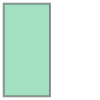

In [9]:
rect = Polygon([(0, 0), (1,0), (1,2), (0,2)])
print(rect)
print(rect.area)
display(rect)

---
### GeoPandas

---
Visualization
- mapboxgl
- sentinelhub
    - [post](https://medium.com/sentinel-hub/upgrading-the-sentinelhub-python-package-2665f9c10df)
    - time lapse [demo](https://youtu.be/_YJfAn0c_yE)
    - environmental monitoring [post](https://medium.com/sentinel-hub/environmental-monitoring-of-conflicts-using-sentinel-2-61f07d76e27b)
    - satellite images + ML using [eo-learn](https://medium.com/sentinel-hub/introducing-eo-learn-ab37f2869f5c)
        - another cool timelapse [demo](https://cdn-images-1.medium.com/max/800/1*-dXNrDf0R4Ksb88-kbdXmg.gif)
        - web browser [EO Browser](https://www.youtube.com/watch?v=m3pron0C0kE)


In [82]:
import os

import pandas as pd

from mapboxgl.utils import create_color_stops, df_to_geojson
from mapboxgl.viz import CircleViz


# Load data from sample csv
data_url = 'https://raw.githubusercontent.com/mapbox/mapboxgl-jupyter/master/examples/data/points.csv'
df = pd.read_csv(data_url)

# Must be a public token, starting with `pk`
token = os.getenv('MAPBOX_ACCESS_TOKEN')

# Create a geojson file export from a Pandas dataframe
df_to_geojson(df, filename='points.geojson',
              properties=['Avg Medicare Payments', 'Avg Covered Charges', 'date'],
              lat='lat', lon='lon', precision=3)

# Generate data breaks and color stops from colorBrewer
color_breaks = [0,10,100,1000,10000]
color_stops = create_color_stops(color_breaks, colors='YlGnBu')

# Create the viz from the dataframe
viz = CircleViz('points.geojson',
                access_token=token,
                height='400px',
                color_property = "Avg Medicare Payments",
                color_stops = color_stops,
                center = (-95, 40),
                zoom = 3,
                below_layer = 'waterway-label'
              )
viz.show()

/Users/hayley/miniconda3/envs/gis/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
